In [27]:
import tensorflow as tf

In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [66]:
# Preprocessing the training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0.2,
                                   shear_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
training_set = train_datagen.flow_from_directory('train_images_split_folders/train/',
                                                 target_size = (128,128),
                                                 batch_size = 5,
                                                 class_mode = 'binary',color_mode="grayscale")

Found 2222 images belonging to 2 classes.


In [67]:
# Preprocessing the test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('train_images_split_folders/val/',
                                            target_size = (128,128),
                                            batch_size = 5,
                                            class_mode = 'binary',color_mode="grayscale")

Found 554 images belonging to 2 classes.


In [9]:
# Building the CNN model

# Initializing the cnn
cnn32 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn32.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Pooling
cnn32.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolution layer and pooling
cnn32.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn32.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattenning
cnn32.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
cnn32.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer, a binary outpu
cnn32.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
# Compile CNN
cnn32.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# Training and evaluating
model_history = cnn32.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
1397/1397 [==============================] - 210s 150ms/step - loss: 0.1057 - accuracy: 0.9791 - val_loss: 0.1063 - val_accuracy: 0.9793
Epoch 2/100
1397/1397 [==============================] - 148s 106ms/step - loss: 0.1021 - accuracy: 0.9793 - val_loss: 0.1000 - val_accuracy: 0.97931:18 - loss: 0.1008 - accu - ETA: 1:18 - loss: 0.1014 - accuracy: 0. - ETA: 1:18 - - ETA: 1:16 - loss: 0.1024  - ETA: 1:13 - loss: 0.1012 - accuracy: 0.97 - ETA: 1:13 - loss: 0.1011 - accuracy - ETA - ETA: 1:08 - loss: 0.1026 - accuracy: 0.97 - ETA: 1:08 - ETA: 1:00 - loss: 0.1010 - accu - ETA: 59s - loss: 0.1015  - ETA: 57s - loss - ETA: 54s - loss: 0.1019 - accuracy: - - ETA: 49s - loss: 0.1021 - accuracy: 0 - ETA: 49s - loss: 0.1 - ETA: 47s - loss: 0.1018 - ac - ETA: 45s - loss: 0.1016 - accurac - ETA: 44s - loss: 0.1015 - accuracy: 0.9 - ETA: 44s - loss: 0.1015 - accuracy: 0.979 - ETA: 44s - ETA:  - ETA: 33s - loss: 0.1025 - accuracy:  - ETA: 32s - loss: 0.1023 - accuracy: 0.979 - ETA: 32s 

1397/1397 [==============================] - 143s 102ms/step - loss: 0.1005 - accuracy: 0.9793 - val_loss: 0.1078 - val_accuracy: 0.9793 0.100 - - ETA: 1:48 - loss: 0.0992 - accuracy:  - ETA: 1:47 - loss: - ETA: 1:47 - loss: 0.099 - E - ETA: 1:44 - l - ETA: 1:40 - loss: 0.0951 - accura - ETA: 1:40 - ETA: 1:38 - los - ETA: 1:37 - loss: 0.0935 - accuracy: 0. - ETA: 1: - ETA: 1:33 - l - ETA: 1:31 - loss: 0.0962 - accuracy: 0.98 - - ETA: 1:29 - loss: 0.096 - ETA:  - ETA: 1:26 - loss: 0.0967  - ETA: 1:25 - los - ETA: 1:24 - loss: 0.0971  - ETA: 1:23 - loss: - ETA: 1:22 - loss: 0.0994 - accu - ETA: 1: - ETA: 1:13 - loss: 0.0987 - accura - ETA: 1:13 - loss: 0.0989 - accura - ETA: 1:12 - loss: 0.098 - ETA: 1:11 - loss: 0.0990 - accu - ETA: 1:04 - loss: 0.0977 - accuracy:  - ETA: 1:04 - loss: 0.0977  - ETA: 1:03 - l - ETA: 56s - loss: 0.0987 - accuracy: 0.9 - ETA: 55s - loss: 0.0986 - a - ETA: 54s - loss: 0.0990 - accuracy: 0.97 - ETA: 54s - loss: 0.0990 - accu - ETA: 53s  - ETA: 45s - loss:  -

1397/1397 [==============================] - 143s 102ms/step - loss: 0.0996 - accuracy: 0.9793 - val_loss: 0.1010 - val_accuracy: 0.97931:57 - loss: 0.1015 - accuracy:  - ETA: 1:56 - loss: 0.1005 -  - ETA - E - ETA:  - ETA: 1:49 - loss: 0.0 - ETA: 1:48 - loss: 0.0938  - ETA: 1:48 - loss: 0.0942 -  - ETA: 1:47 - loss: 0.0947 - accuracy:  - ETA: 1:46 - loss: - ETA: 1:45 - loss: 0.0959 - accuracy:  - ETA: 1:45 - loss: - ETA: 1:44 - loss: 0.0967 - accuracy - ETA: 1:43 - loss: 0.096 - ETA: 1:36 - loss: 0.0958  - ETA: 1:35 - loss: 0.096 - ETA: 1:34 - loss: 0.0957 - accura - ETA: 1:34 - E - ETA: 1:02 - loss: 0.0946 - accuracy:  - ETA: 1:02 - loss: - ETA: 57s - loss: 0.0956 - ETA: 55s - loss: 0.0959 - accuracy:  - ETA: 51s - loss: 0.0970 - accu - ETA: 49s - loss: 0.0972 - accuracy - ETA: 49s - loss: 0.0977 - accuracy: 0.979 - ETA: 49s -  - ETA: 46s - loss: 0 - ETA: 44s - loss:  - ETA: 41s - loss: 0.0996 - accuracy: - ETA: 41s - loss: 0.0994 - accuracy: 0.9 - ETA: 40s - loss: 0.0995 - accuracy 

1397/1397 [==============================] - 149s 107ms/step - loss: 0.0992 - accuracy: 0.9793 - val_loss: 0.1512 - val_accuracy: 0.9793: 0. - ETA: 1:20 - loss: 0.0963 - accuracy: 0.98 - ETA: 1:20 - l - ETA: 1:18 - loss: 0.0962 - accuracy: 0. - ETA: 1:16 - loss: 0.0976 - accuracy:  - ETA: 1:15 - loss: 0.0974 - accuracy:  - ETA: 1:15 - l - ETA: 1:13 - l - ETA: 1:10 - loss: - ETA: 1:02 - loss: 0.1001 - accuracy: 0.97 - ETA: 1:02 - lo - ETA: 52s - loss:  - ETA: 50s - loss: 0. - ETA: 47s - loss: 0.0995 - - ETA: 46s - loss: 0.0997 - accuracy: - ETA: 45s - loss: 0.1000 - ac - ETA: 44s - loss: 0.1006 - accurac - ETA: 43s - loss: 0.1007 - accuracy: 0.9 - ETA: 43s - loss: 0.1007 - accuracy - ETA: 42s - loss: 0.1010 - accu - ETA: 41s - loss: 0.1014 - accuracy: 0.978 - ETA: 40s - loss: 0. - ETA: 34s - loss: 0.1012 - accura - ETA: 33s - loss: 0. - ETA: 31s - loss: 0.1014 - acc - ETA: 29s - loss - ETA: 27s - loss: 0.1010 - accuracy:  - ETA: 26s - loss: 0.1008 - accuracy: 0. - ETA: 26s - loss: 0.100

1397/1397 [==============================] - 149s 107ms/step - loss: 0.1039 - accuracy: 0.9793 - val_loss: 0.1026 - val_accuracy: 0.9792curacy:  - ETA: 2:04 - ETA: 1:30 - loss: 0 - ETA: 1:29 - loss: 0.1190 - accuracy - ETA: 1:28 - loss: 0.1190 - accuracy:  - ETA: 1:28 - loss: 0.1186 -  - ETA: 1:25 - loss: 0.1166 - accuracy:  - ETA: 1:24 - loss: 0.1162 - accuracy - ETA - ETA: 1:22 - loss: 0.1151 - accu - ETA: 1:21 - - ETA: 1:11 - loss: 0.1115  - ETA: 1:10 - - ETA: 1:09 - loss: 0.1118 - accu - ETA: 1:01 - lo - ETA: 56s - loss: 0.1093 - accuracy: 0.9 - ETA: 56s - loss: 0.1090 - accura - ETA: 55s - loss: 0.1087 - accuracy: 0. - ETA: 54s - loss: 0.1087 - ac - ETA: 53s - loss: 0.1088 - accuracy: 0.978 - ETA: 53s - loss: 0.1087 - accuracy: 0.97 - ETA: 53s - loss: 0.1085 - accuracy: 0.9 - ETA: 52s - loss: - ETA: 50s - loss: 0.1092 - ETA: 48s - loss: 0.1090 - a - ETA: 47s - loss: 0.1088 - accurac - ETA: 46s - loss: 0.1084 - accuracy: 0.978 - ETA: 46s - loss: 0.1084 -  - ETA: - ETA: 36s - loss: 

1397/1397 [==============================] - 148s 106ms/step - loss: 0.0992 - accuracy: 0.9793 - val_loss: 0.1125 - val_accuracy: 0.97933 - accuracy: 0.97 - ETA: 2:00 - loss: 0.0 - E - ETA: 1:28 - loss: 0.1022 - accuracy - ETA: 1:27 - loss: 0.1018 -  - ETA: 1:27 - loss: 0.1024 - accuracy: 0.97 - ETA: 1:26 - loss: 0.1025 - accu - ETA: 1:26 - - ETA:  - ETA: 1:18 - ETA: 1:17 - loss: 0.1040 - accu - ETA: 1: - ETA: 1:12 - loss: - ETA: 1:11 - loss: 0 - ETA: 1:10 - loss: 0.1027 -  - ETA: 1:07 - loss: 0.1 - ETA: 1:05 - loss: 0.1009  - ETA: 1:02 - loss: 0.1016 - accuracy: 0.97 - ETA: 1:02 - loss: - ETA: 1:01 - loss: - ETA: 1:00 - loss - ETA: 58s - loss: 0.1014 - accuracy: 0. - ETA: 57s - loss: 0.1012 - ac - ETA: 56s - loss: 0.0998 - accu - ETA: 42s - loss: 0.1000 - accuracy: 0.9 - ETA: 42s - loss: 0.0998 - accuracy: 0.97 - ETA: 41s  - ETA: 30 - - ETA: 22s - loss: 0.1000 - accuracy: 0 - ETA: 22s - loss: 0.1004 - accuracy - ETA: 21s - loss: 0.1002 - accuracy: 0.979 - ETA: 21s - loss: 0.1002 - acc

1397/1397 [==============================] - 147s 105ms/step - loss: 0.0978 - accuracy: 0.9793 - val_loss: 0.1069 - val_accuracy: 0.9793oss: 0.0952 - accuracy: 0. - ETA: 1:56 - loss: 0.0941 - accu - ETA: 1:54 - loss: 0.0926 - accuracy - ETA: 1:54 - loss: 0.0945 - accuracy - ETA: 1:54 - loss: 0.0934 - accura - ETA: 1:53 - loss: 0.0933 - accuracy: 0. - E - ETA: 1:51 - loss: 0.0938 - accuracy:  - ETA: 1:51 - los - ETA: 1:37 - loss: 0.098 - ETA: 1: - ETA: 1:34 - loss: 0.0978 - ac - ETA: 1:33 - ETA: 1:24 - loss: 0.0979 - accuracy: 0. - ETA:  - ETA: 1:22 - loss: 0.0979 - accu - ETA: 1:22 - loss: 0.0980 - accu - ETA: 1:08 - loss: 0.0988 - accuracy: 0.97 - ETA: 1:08 - loss: 0.0990 - accuracy - ETA: 1:08 -  - ETA: 59s - loss: 0.1005 - accu - ETA: 58s - loss: 0.1004 - accuracy: 0 - ETA: 58s - loss: 0.100 - ETA: 56s - loss: 0.1017 - ac - ETA: 54s - lo - ETA: 52s - loss: 0.1016 - accuracy: 0.978 - ETA: 52s - loss: 0.1015 - accuracy: 0 - ETA: 51s - loss: 0.1019 - accuracy:  - ETA: 51s - lo - ETA: 4

1397/1397 [==============================] - 148s 106ms/step - loss: 0.0975 - accuracy: 0.9793 - val_loss: 0.1031 - val_accuracy: 0.9791 0.0 - ETA: 2:11 - loss: 0.0787 - accuracy - ETA: 2:10 - loss: 0.0811 - accuracy: 0.98 - ETA: 2:10 - loss: 0.0824 - accura - ETA: 2:09 - loss: 0 - E - ETA: 2:05 - loss: 0.0891 - accuracy - ETA: 2:04 - loss: 0.0908  - ETA: 2:03 - loss: 0.0911 - ac - ETA: 2:02 - loss: 0.0883 -  - ETA:  - ETA: 1:59 - loss: 0.0902 - accu - ETA: 1:35 - loss: 0 - ETA: 1:34 - loss: 0.0982 - accuracy: 0. - ETA: 1:33 - loss: 0.0987 - accuracy:  - ETA: 1:33 - l - ETA: 1:32 - ETA - ETA: 1:28 - loss: 0.0955  - ETA: 1:27 - loss: 0.0953 - accuracy: 0.97 - ETA: 1:27 - loss: 0.0954 - accuracy: 0. - ETA: 1:27 - ETA - ETA: 1:16 - loss: 0.0970 - accuracy: 0. - ETA: 1:16 - loss: 0.0972 - accuracy - ETA: 1:16 - l - ETA: 1:14 - - ETA: 1:04 - l - ETA:  - ETA: 58s - loss: 0.095 - ETA: 56s - loss: 0 - ETA:  - ETA: 46s - loss: 0.09 - ETA: 44s - loss: 0.0959 - accura - ETA: 43s - loss: 0.0956  -

1397/1397 [==============================] - 148s 106ms/step - loss: 0.0968 - accuracy: 0.9793 - val_loss: 0.1065 - val_accuracy: 0.9789: 1:38 - loss: 0.1028 - accura - ETA: 1:37 - loss: 0.1020 - accuracy: 0. - ETA: 1:37 - loss: 0.1024 - accura - ETA: 1:37 - loss: 0.1019 - accuracy:  - ETA:  - ETA: 1:26 - loss: 0.1023  - ETA: 1:12 - loss: - ETA: 1:10 - loss: 0.0 - ETA: 1:07 - loss: 0.0968 -  - ETA: 1:04 - loss: - ETA: 1:01 - loss: 0.0949 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0950 - accura - ETA: 1:00 - loss: 0.0948 - accuracy - ETA: 1:00 - loss: 0.0948 - ETA: 58s - loss: 0.0951 - accura - ETA: 57s - loss: 0.0959 - ETA: 56s - loss: 0.0965 - accura - ETA: 55s - loss: 0.0964 - accuracy: - ETA: 54s - loss: 0.0964 - accuracy:  - ETA: 53s - loss: 0.0965 - accuracy: 0.979 - ETA: 53s - loss: 0.0964 - ETA: 51s - loss: - ETA: 49s - loss: 0.0965 - accuracy: 0 - ETA: 48s - loss: 0.0968 - accuracy:  - ETA: 48s - loss: 0.0 - ETA: 46s - loss: 0.0971 - accuracy: 0 - ETA: 45s - loss: 0.0970 - - ETA: 3

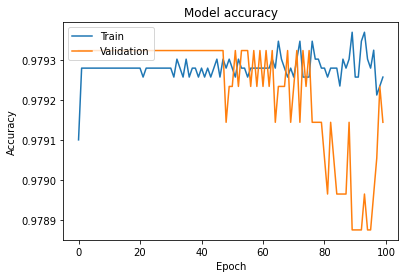

In [13]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

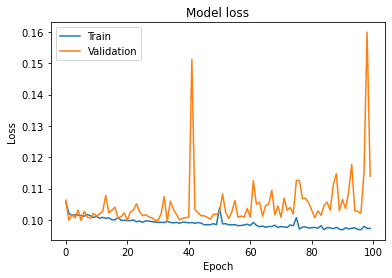

In [14]:
# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
training_set.class_indices

{'has_cancer': 0, 'has_no_cancer': 1}

In [16]:
import numpy as np
from keras.preprocessing import image

In [24]:
test_image = image.load_img('train_images_split_folders/val/has_no_cancer.png', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn32.predict(test_image)


In [25]:
if result[0][0] == 1:
    prediction = 'has_no_cancer'
else:
    prediction = 'has_cancer'

In [26]:
print(prediction)

has_no_cancer


In [35]:
# Building the CNN model

# Initializing the cnn
cnn32_epoch50 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn32_epoch50.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Pooling
cnn32_epoch50.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolution layer and pooling
cnn32_epoch50.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn32_epoch50.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattenning
cnn32_epoch50.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
cnn32_epoch50.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer, a binary outpu
cnn32_epoch50.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile CNN
cnn32_epoch50.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
# Training and evaluating
model_history_epoch50 = cnn32_epoch50.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
1397/1397 [==============================] - 142s 102ms/step - loss: 0.1072 - accuracy: 0.9789 - val_loss: 0.1002 - val_accuracy: 0.9793
Epoch 2/50
1397/1397 [==============================] - 145s 104ms/step - loss: 0.1026 - accuracy: 0.9793 - val_loss: 0.1002 - val_accuracy: 0.9793s: - ETA - ETA:  - ETA: 1:06 - los - ETA: 1:05 - loss: 0.099 - ETA: 1:04 - loss: 0.0992 - accuracy - ETA: 1:03 - loss: - ETA: 1:02 - loss - ETA: 54s - loss - ETA: 52s - loss: 0.09 - ETA: - ETA: 46s - loss: 0.1008 -  - ETA: 44s - loss: - ETA: 42s - loss: 0.1017 - accuracy:  - ETA: 41s - loss: 0.1018 - accura - ETA: 40s - loss: 0.1016 - - ETA: 39s - loss: 0.1021 - accuracy: 0.97 - ETA: 39s - loss: 0.1020 - acc - ETA: 37s - l - - ETA: 31s - loss: - ETA: 28s - loss: 0.102 - ETA: 26s - loss: 0.1033 - - ETA: 25s - loss: 0.1030 - ac - ETA: 4s - loss: 0.1024 - accuracy: 0.97 - ETA: 4s - loss: 0.1024 - accuracy: 0. - ETA: 4s - loss: - ETA: 2s - loss: 0.1 - ETA: 1s - - ETA: 0s - loss: 0.1026 - accuracy
Epo

1397/1397 [==============================] - 151s 108ms/step - loss: 0.0999 - accuracy: 0.9793 - val_loss: 0.1041 - val_accuracy: 0.9793s: 0.0990 -  - ETA: 1:04 - loss: 0.097 - ETA - ETA: 57s - loss: 0.0987 - accuracy: 0.979 - ETA: 57s - loss: 0.09 - ETA: 55s - loss: 0.0980  - ETA: 53s - loss: 0.0971 - accuracy: 0.98 - ETA: 53s - loss: 0.0969 - accuracy: 0. - ETA: 52s - loss: 0.0968 - accuracy:  - ETA: 52s - loss: 0.0973 - ETA: 50s - loss: 0.0976 - accuracy: 0.97 - ETA: 49s - loss: 0.0977 - accuracy: 0 - ETA: 49s - loss:  - ETA: 46s - loss: 0.0985 - accuracy: 0 - ETA: 46s - loss: 0.0986 - ac - ETA: 35s - loss: 0.0981 - accurac - ETA: 35s - loss: 0.0979 - accu - E - ETA: 20s - loss: 0.0993 - ETA: 18s - loss: 0.0993 - accuracy: 0.979 - ETA: 18s - loss: 0.0993 - accuracy: 0.979 - ETA: 18s - loss: 0.0992 - accuracy: 0.9 - ETA: 18s - loss: 0.099 - ETA: 16s - loss: 0.0999 - accuracy: 0.9 - ETA: 16s - loss: 0.1001 - accuracy: 0. - ETA: 15s - loss: 0.1000 - ETA: 13s - loss: 0.1002 - accuracy: 

1397/1397 [==============================] - 144s 103ms/step - loss: 0.0987 - accuracy: 0.9793 - val_loss: 0.1002 - val_accuracy: 0.97930. - ETA: 2:05 - loss: 0.1180 -  - ETA: 2:04 - - E - ETA: 1:51 - l - ETA: 1:49 - loss: 0.1076  - ETA: 1:36 - loss: 0.102 - ETA: 1:35 - loss: 0.1003 - ac - ETA: 1:35 - loss: 0.1004 - accura - ETA: 1:34 - loss: 0.1003 - accuracy: 0.97 - ETA: 1:06 - loss: 0.1006 - ac - ETA: 57s - loss: 0.1011 - accur - ETA: 56s - loss: 0.1013 - accuracy - ETA: 56s - loss: 0.1014  - ETA: 54s - loss: 0.1015 - accuracy: 0. - ETA: 53s - loss: 0.1013 - accuracy: 0.97 - ETA: 53s - loss: 0.1011 - accuracy: 0.978 - ETA: 53s - loss: 0.1010 - accur - ETA: 52s - loss: 0. - ETA: 50s - loss:  - ETA: 48s - loss: 0.1002  - ETA: 46s - loss: 0.1003 - accuracy: 0. - ETA: 46s - loss: 0.1002 - accurac - ETA: 45s - loss: 0.1003 - accuracy: 0 - ETA: 44s - l - ETA: 41s - loss: 0.0995 - accuracy: 0.979 - ETA: 41s - loss: 0.0994 - ac - ETA: 40s - l - ETA: 37s - lo - ETA: 30s - loss: 0.0 - ETA: 28

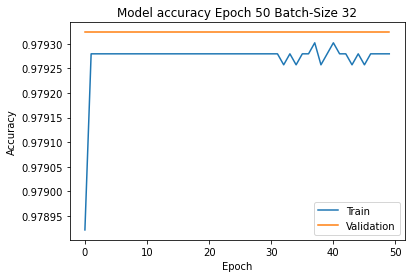

In [46]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(model_history_epoch50.history['accuracy'])
plt.plot(model_history_epoch50.history['val_accuracy'])
plt.title('Model accuracy Epoch 50 Batch-Size 32')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

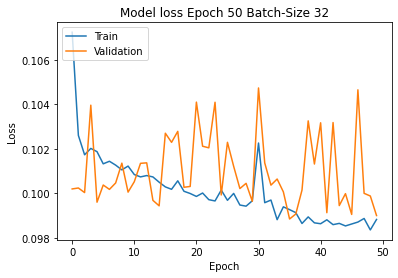

In [38]:
# Plot training & validation loss values
plt.plot(model_history_epoch50.history['loss'])
plt.plot(model_history_epoch50.history['val_loss'])
plt.title('Model loss Epoch 50 Batch-Size 32')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
training_set.class_indices

{'has_cancer': 0, 'has_no_cancer': 1}

In [40]:
import numpy as np
from keras.preprocessing import image

In [41]:
test_image = image.load_img('train_images_split_folders/val/has_no_cancer.png', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn32_epoch50.predict(test_image)

In [42]:
if result[0][0] == 1:
    prediction = 'has_no_cancer'
else:
    prediction = 'has_cancer'

In [43]:
print(prediction)

has_no_cancer


In [44]:
test_image2 = image.load_img('train_images_split_folders/val/has_cancer.png', target_size=(64,64))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis=0)
result2 = cnn32_epoch50.predict(test_image2)

if result2[0][0] == 1:
    prediction = 'has_no_cancer'
else:
    prediction = 'has_cancer'
    
print(prediction)

has_no_cancer


In [38]:
# Building the CNN model

# Initializing the cnn
cnn32_epoch100_inputshape1 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn32_epoch100_inputshape1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="same", activation='relu', input_shape=[64, 64, 1]))

# Pooling
cnn32_epoch100_inputshape1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Adding a second convolution layer and pooling
cnn32_epoch100_inputshape1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="same", activation='relu'))
cnn32_epoch100_inputshape1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Flattenning
cnn32_epoch100_inputshape1.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
cnn32_epoch100_inputshape1.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer, a binary outpu
cnn32_epoch100_inputshape1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile CNN
cnn32_epoch100_inputshape1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
# Training and evaluating
model_history_epoch100_inputshape1 = cnn32_epoch100_inputshape1.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
58/58 [==============================] - 11s 194ms/step - loss: 0.7152 - accuracy: 0.4924 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 2/100
58/58 [==============================] - 12s 206ms/step - loss: 0.6929 - accuracy: 0.5038 - val_loss: 0.6924 - val_accuracy: 0.5022
Epoch 3/100
58/58 [==============================] - 12s 207ms/step - loss: 0.6931 - accuracy: 0.5308 - val_loss: 0.6862 - val_accuracy: 0.5433
Epoch 4/100
58/58 [==============================] - 11s 193ms/step - loss: 0.6913 - accuracy: 0.5340 - val_loss: 0.6962 - val_accuracy: 0.5281
Epoch 5/100
58/58 [==============================] - 12s 199ms/step - loss: 0.6894 - accuracy: 0.5281 - val_loss: 0.6915 - val_accuracy: 0.5281
Epoch 6/100
58/58 [==============================] - 11s 197ms/step - loss: 0.6901 - accuracy: 0.5437 - val_loss: 0.6831 - val_accuracy: 0.5541
Epoch 7/100
58/58 [==============================] - 12s 199ms/step - loss: 0.6840 - accuracy: 0.5670 - val_loss: 0.6792 - val_accuracy:

58/58 [==============================] - 13s 219ms/step - loss: 0.3018 - accuracy: 0.8677 - val_loss: 1.3692 - val_accuracy: 0.5541
Epoch 58/100
58/58 [==============================] - 13s 227ms/step - loss: 0.2849 - accuracy: 0.8731 - val_loss: 1.4808 - val_accuracy: 0.5303
Epoch 59/100
58/58 [==============================] - 14s 239ms/step - loss: 0.2871 - accuracy: 0.8823 - val_loss: 1.4607 - val_accuracy: 0.5455
Epoch 60/100
58/58 [==============================] - 13s 230ms/step - loss: 0.2712 - accuracy: 0.8877 - val_loss: 1.5381 - val_accuracy: 0.5325
Epoch 61/100
58/58 [==============================] - 13s 225ms/step - loss: 0.2638 - accuracy: 0.8866 - val_loss: 1.5495 - val_accuracy: 0.5541
Epoch 62/100
58/58 [==============================] - 13s 217ms/step - loss: 0.2618 - accuracy: 0.8958 - val_loss: 1.4540 - val_accuracy: 0.5281
Epoch 63/100
58/58 [==============================] - 13s 218ms/step - loss: 0.2518 - accuracy: 0.8898 - val_loss: 1.5145 - val_accuracy: 0.547

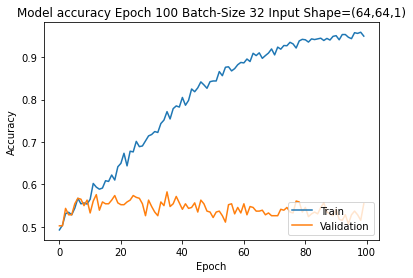

In [40]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(model_history_epoch100_inputshape1.history['accuracy'])
plt.plot(model_history_epoch100_inputshape1.history['val_accuracy'])
plt.title('Model accuracy Epoch 100 Batch-Size 32 Input Shape=(64,64,1)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

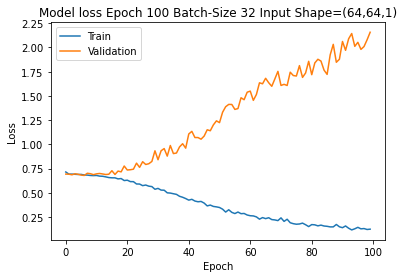

In [41]:
# Plot training & validation loss values
plt.plot(model_history_epoch100_inputshape1.history['loss'])
plt.plot(model_history_epoch100_inputshape1.history['val_loss'])
plt.title('Model loss Epoch 100 Batch-Size 32 Input Shape=(64,64,1)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
training_set.class_indices

{'has_cancer': 0, 'has_no_cancer': 1}

In [18]:
import os

# Walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("train_images_split_folders/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'train_images_split_folders/'.
There are 2 directories and 0 images in 'train_images_split_folders/train'.
There are 0 directories and 926 images in 'train_images_split_folders/train\has_cancer'.
There are 0 directories and 43764 images in 'train_images_split_folders/train\has_no_cancer'.
There are 2 directories and 2 images in 'train_images_split_folders/val'.
There are 0 directories and 231 images in 'train_images_split_folders/val\has_cancer'.
There are 0 directories and 10941 images in 'train_images_split_folders/val\has_no_cancer'.


In [49]:
import random
import os
import shutil

# Get a list of all the files in the source folder
source_folder = "train_images_split_folders/all_no_cancer_data/has_no_cancer/"
files = os.listdir(source_folder)

# Randomly select a number of files
num_files_to_select = 1296
selected_files = random.sample(files, num_files_to_select)

# Create the destination folder if it doesn't exist
destination_folder = "train_images_split_folders/train/has_no_cancer"
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the selected files to the destination folder
for file in selected_files:
    shutil.copy(os.path.join(source_folder, file), destination_folder)

# Print a message to let the user know that the files have been copied
print("The selected files have been copied to the destination folder.")

The selected files have been copied to the destination folder.


In [50]:
import random
import os
import shutil

# Get a list of all the files in the source folder
source_folder = "train_images_split_folders/all_no_cancer_val_set/has_no_cancer/"
files = os.listdir(source_folder)

# Randomly select a number of files
num_files_to_select = 323
selected_files = random.sample(files, num_files_to_select)

# Create the destination folder if it doesn't exist
destination_folder = "train_images_split_folders/val/has_no_cancer/"
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the selected files to the destination folder
for file in selected_files:
    shutil.copy(os.path.join(source_folder, file), destination_folder)

# Print a message to let the user know that the files have been copied
print("The selected files have been copied to the destination folder.")

The selected files have been copied to the destination folder.


In [23]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['37032_1291044944.png']
Image shape: (256, 256)


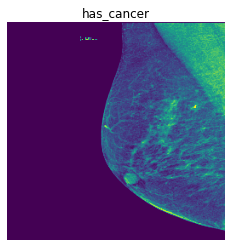

In [25]:
# View a random image from the training dataset
img = view_random_image(target_dir="train_images_split_folders/",
                        target_class="has_cancer")

In [ ]:
# Building the CNN model

# Initializing the cnn
cnn32 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn32.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Pooling
cnn32.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolution layer and pooling
cnn32.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn32.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattenning
cnn32.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
cnn32.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer, a binary outpu
cnn32.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [45]:
# Building the CNN model

# Initializing the cnn
cnn32_filters10 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn32_filters10.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu', input_shape=[64, 64, 1]))

# Pooling
cnn32_filters10.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Adding a second convolution layer and pooling
cnn32_filters10.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu'))
cnn32_filters10.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Flattenning
cnn32_filters10.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
cnn32_filters10.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer, a binary outpu
cnn32_filters10.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile CNN
cnn32_filters10.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training and evaluating
model_history_cnn32_filters10 = cnn32_filters10.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
58/58 [==============================] - 5s 84ms/step - loss: 0.6991 - accuracy: 0.5162 - val_loss: 0.6862 - val_accuracy: 0.5779
Epoch 2/100
58/58 [==============================] - 5s 86ms/step - loss: 0.6879 - accuracy: 0.5508 - val_loss: 0.6971 - val_accuracy: 0.5325
Epoch 3/100
58/58 [==============================] - 6s 95ms/step - loss: 0.6849 - accuracy: 0.5481 - val_loss: 0.6925 - val_accuracy: 0.5628
Epoch 4/100
58/58 [==============================] - 5s 94ms/step - loss: 0.6812 - accuracy: 0.5594 - val_loss: 0.7024 - val_accuracy: 0.5087
Epoch 5/100
58/58 [==============================] - 5s 90ms/step - loss: 0.6760 - accuracy: 0.5853 - val_loss: 0.6983 - val_accuracy: 0.5736
Epoch 6/100
58/58 [==============================] - 6s 101ms/step - loss: 0.6717 - accuracy: 0.5864 - val_loss: 0.6932 - val_accuracy: 0.5498
Epoch 7/100
58/58 [==============================] - 5s 92ms/step - loss: 0.6689 - accuracy: 0.5821 - val_loss: 0.6900 - val_accuracy: 0.5628
Epoch

58/58 [==============================] - 7s 115ms/step - loss: 0.2772 - accuracy: 0.8817 - val_loss: 1.3615 - val_accuracy: 0.5368
Epoch 59/100
58/58 [==============================] - 7s 119ms/step - loss: 0.2472 - accuracy: 0.9066 - val_loss: 1.4787 - val_accuracy: 0.5584
Epoch 60/100
58/58 [==============================] - 7s 123ms/step - loss: 0.2506 - accuracy: 0.8915 - val_loss: 1.4447 - val_accuracy: 0.5671
Epoch 61/100
58/58 [==============================] - 6s 109ms/step - loss: 0.2433 - accuracy: 0.9006 - val_loss: 1.4547 - val_accuracy: 0.5628
Epoch 62/100
58/58 [==============================] - 6s 110ms/step - loss: 0.2542 - accuracy: 0.9071 - val_loss: 1.4976 - val_accuracy: 0.5519
Epoch 63/100
58/58 [==============================] - 6s 107ms/step - loss: 0.2511 - accuracy: 0.8963 - val_loss: 1.5193 - val_accuracy: 0.5498
Epoch 64/100
58/58 [==============================] - 6s 106ms/step - loss: 0.2323 - accuracy: 0.9087 - val_loss: 1.4997 - val_accuracy: 0.5368
Epoch

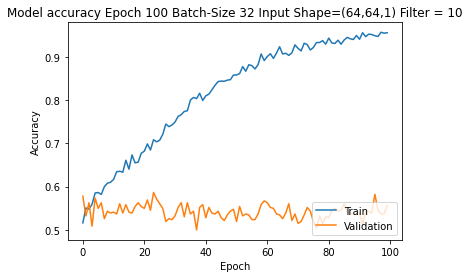

In [46]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(model_history_cnn32_filters10.history['accuracy'])
plt.plot(model_history_cnn32_filters10.history['val_accuracy'])
plt.title('Model accuracy Epoch 100 Batch-Size 32 Input Shape=(64,64,1) Filter = 10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

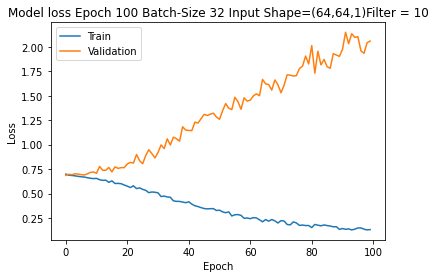

In [47]:
# Plot training & validation loss values
plt.plot(model_history_cnn32_filters10.history['loss'])
plt.plot(model_history_cnn32_filters10.history['val_loss'])
plt.title('Model loss Epoch 100 Batch-Size 32 Input Shape=(64,64,1)Filter = 10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
# Building the CNN model with more images for non-cancerous

# Initializing the cnn
cnn32_filters10 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn32_filters10.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu', input_shape=[256, 256, 1]))

# Pooling
cnn32_filters10.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Adding a second convolution layer and pooling
cnn32_filters10.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu'))
cnn32_filters10.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Flattenning
cnn32_filters10.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
cnn32_filters10.add(tf.keras.layers.Dense(units=512, activation='relu'))

# Output layer, a binary outpu
cnn32_filters10.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile CNN
cnn32_filters10.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training and evaluating
model_history_cnn32_filters10 = cnn32_filters10.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
70/70 [==============================] - 194s 3s/step - loss: 0.9600 - accuracy: 0.5522 - val_loss: 0.6850 - val_accuracy: 0.5812
Epoch 2/100
70/70 [==============================] - 170s 2s/step - loss: 0.6794 - accuracy: 0.5833 - val_loss: 0.6747 - val_accuracy: 0.5830
Epoch 3/100
70/70 [==============================] - 174s 2s/step - loss: 0.6784 - accuracy: 0.5837 - val_loss: 0.6714 - val_accuracy: 0.5776
Epoch 4/100
70/70 [==============================] - 177s 3s/step - loss: 0.6835 - accuracy: 0.5788 - val_loss: 0.6703 - val_accuracy: 0.5812
Epoch 5/100
70/70 [==============================] - 169s 2s/step - loss: 0.6804 - accuracy: 0.5761 - val_loss: 0.6695 - val_accuracy: 0.5884
Epoch 6/100
70/70 [==============================] - 187s 3s/step - loss: 0.6760 - accuracy: 0.5855 - val_loss: 0.6699 - val_accuracy: 0.5830
Epoch 7/100
70/70 [==============================] - 185s 3s/step - loss: 0.6759 - accuracy: 0.5846 - val_loss: 0.6673 - val_accuracy: 0.5812
Epoch 

70/70 [==============================] - 164s 2s/step - loss: 0.6704 - accuracy: 0.5806 - val_loss: 0.6630 - val_accuracy: 0.5722
Epoch 59/100
70/70 [==============================] - 164s 2s/step - loss: 0.6643 - accuracy: 0.5887 - val_loss: 0.6689 - val_accuracy: 0.5668
Epoch 60/100
70/70 [==============================] - 163s 2s/step - loss: 0.6661 - accuracy: 0.5941 - val_loss: 0.6721 - val_accuracy: 0.5523
Epoch 61/100
70/70 [==============================] - 163s 2s/step - loss: 0.6727 - accuracy: 0.5873 - val_loss: 0.6657 - val_accuracy: 0.5596
Epoch 62/100
70/70 [==============================] - 167s 2s/step - loss: 0.6681 - accuracy: 0.5855 - val_loss: 0.6707 - val_accuracy: 0.5271
Epoch 63/100
70/70 [==============================] - 165s 2s/step - loss: 0.6674 - accuracy: 0.5846 - val_loss: 0.6655 - val_accuracy: 0.5433
Epoch 64/100
70/70 [==============================] - 164s 2s/step - loss: 0.6694 - accuracy: 0.5851 - val_loss: 0.6664 - val_accuracy: 0.5686
Epoch 65/100

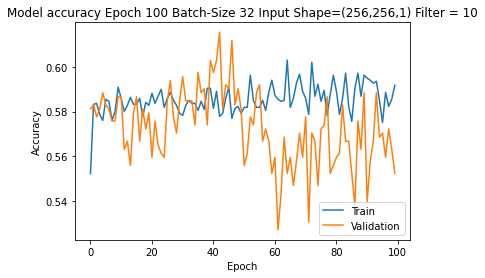

In [57]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(model_history_cnn32_filters10.history['accuracy'])
plt.plot(model_history_cnn32_filters10.history['val_accuracy'])
plt.title('Model accuracy Epoch 100 Batch-Size 32 Input Shape=(256,256,1) Filter = 10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

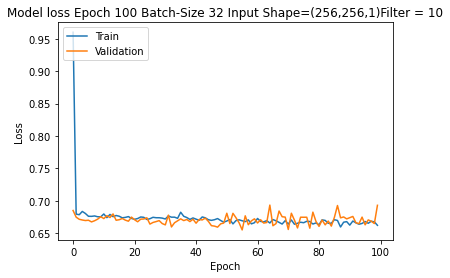

In [58]:
# Plot training & validation loss values
plt.plot(model_history_cnn32_filters10.history['loss'])
plt.plot(model_history_cnn32_filters10.history['val_loss'])
plt.title('Model loss Epoch 100 Batch-Size 32 Input Shape=(256,256,1)Filter = 10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [59]:
training_set.class_indices

{'has_cancer': 0, 'has_no_cancer': 1}

In [60]:
import numpy as np
from keras.preprocessing import image


test_imagesize256 = image.load_img('train_images_split_folders/val/has_cancer.png', target_size=(256,256))
test_imagesize256 = image.img_to_array(test_imagesize256)
test_imagesize256 = np.expand_dims(test_imagesize256, axis=0)
resultsize256 = cnn32_filters10(test_imagesize256)

if resultsize256[0][0] == 1:
    prediction = 'has_no_cancer'
else:
    prediction = 'has_cancer'
    
print(prediction)

UnimplementedError: The Conv2D op currently does not support grouped convolutions on the CPU. A grouped convolution was attempted to be run because the input depth of 3 does not match the filter input depth of 1 [Op:Conv2D]

In [63]:
# Building the CNN model with more images for non-cancerous but filter = 10, size=64, batch = 5

# Initializing the cnn
cnn5_filters10 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn5_filters10.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu', input_shape=[64,64,1]))

# Pooling
cnn5_filters10.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Adding a second convolution layer and pooling
cnn5_filters10.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu'))
cnn5_filters10.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Flattenning
cnn5_filters10.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
cnn5_filters10.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer, a binary outpu
cnn5_filters10.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile CNN
cnn5_filters10.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training and evaluating
model_history_cnn5_filters10 = cnn5_filters10.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
445/445 [==============================] - 13s 30ms/step - loss: 0.6859 - accuracy: 0.5806 - val_loss: 0.6786 - val_accuracy: 0.5830
Epoch 2/100
445/445 [==============================] - 13s 29ms/step - loss: 0.6826 - accuracy: 0.5833 - val_loss: 0.6782 - val_accuracy: 0.5830
Epoch 3/100
445/445 [==============================] - 13s 30ms/step - loss: 0.6819 - accuracy: 0.5779 - val_loss: 0.6759 - val_accuracy: 0.5830
Epoch 4/100
445/445 [==============================] - 13s 30ms/step - loss: 0.6789 - accuracy: 0.5833 - val_loss: 0.6784 - val_accuracy: 0.5830
Epoch 5/100
445/445 [==============================] - 14s 31ms/step - loss: 0.6800 - accuracy: 0.5833 - val_loss: 0.6767 - val_accuracy: 0.5830
Epoch 6/100
445/445 [==============================] - 14s 31ms/step - loss: 0.6782 - accuracy: 0.5833 - val_loss: 0.6773 - val_accuracy: 0.5830
Epoch 7/100
445/445 [==============================] - 14s 31ms/step - loss: 0.6815 - accuracy: 0.5833 - val_loss: 0.6773 - val_ac

445/445 [==============================] - 14s 32ms/step - loss: 0.6660 - accuracy: 0.5882 - val_loss: 0.6782 - val_accuracy: 0.5415
Epoch 58/100
445/445 [==============================] - 14s 32ms/step - loss: 0.6640 - accuracy: 0.5909 - val_loss: 0.6736 - val_accuracy: 0.5578
Epoch 59/100
445/445 [==============================] - 14s 31ms/step - loss: 0.6651 - accuracy: 0.5810 - val_loss: 0.6882 - val_accuracy: 0.5415
Epoch 60/100
445/445 [==============================] - 14s 32ms/step - loss: 0.6694 - accuracy: 0.5797 - val_loss: 0.6684 - val_accuracy: 0.5632
Epoch 61/100
445/445 [==============================] - 14s 32ms/step - loss: 0.6641 - accuracy: 0.5770 - val_loss: 0.6677 - val_accuracy: 0.5704
Epoch 62/100
445/445 [==============================] - 14s 32ms/step - loss: 0.6670 - accuracy: 0.5797 - val_loss: 0.6727 - val_accuracy: 0.5505
Epoch 63/100
445/445 [==============================] - 14s 32ms/step - loss: 0.6641 - accuracy: 0.5828 - val_loss: 0.6864 - val_accuracy

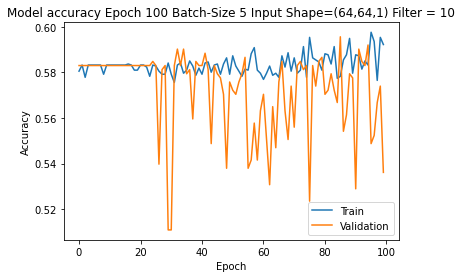

In [64]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(model_history_cnn5_filters10.history['accuracy'])
plt.plot(model_history_cnn5_filters10.history['val_accuracy'])
plt.title('Model accuracy Epoch 100 Batch-Size 5 Input Shape=(64,64,1) Filter = 10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

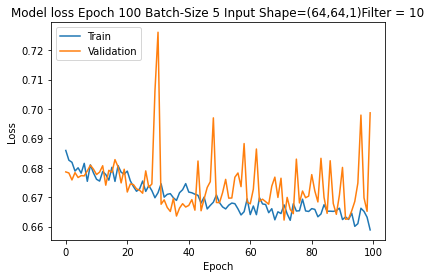

In [65]:
# Plot training & validation loss values
plt.plot(model_history_cnn5_filters10.history['loss'])
plt.plot(model_history_cnn5_filters10.history['val_loss'])
plt.title('Model loss Epoch 100 Batch-Size 5 Input Shape=(64,64,1)Filter = 10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [68]:
# Building the CNN model with more images for non-cancerous but filter = 10, size=128, batch = 5

# Initializing the cnn
cnn5_filters10_size128 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn5_filters10_size128.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu', input_shape=[128,128,1]))

# Pooling
cnn5_filters10_size128.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Adding a second convolution layer and pooling
cnn5_filters10_size128.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu'))
cnn5_filters10_size128.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Flattenning
cnn5_filters10_size128.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
cnn5_filters10_size128.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Output layer, a binary outpu
cnn5_filters10_size128.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile CNN
cnn5_filters10_size128.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training and evaluating
model_history_cnn5_filters10_size128 = cnn5_filters10_size128.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
445/445 [==============================] - 74s 166ms/step - loss: 0.6897 - accuracy: 0.5765 - val_loss: 0.6789 - val_accuracy: 0.5830
Epoch 2/100
445/445 [==============================] - 79s 178ms/step - loss: 0.6787 - accuracy: 0.5837 - val_loss: 0.6776 - val_accuracy: 0.5830
Epoch 3/100
445/445 [==============================] - 80s 180ms/step - loss: 0.6783 - accuracy: 0.5833 - val_loss: 0.6712 - val_accuracy: 0.5830
Epoch 4/100
445/445 [==============================] - 81s 181ms/step - loss: 0.6791 - accuracy: 0.5828 - val_loss: 0.6778 - val_accuracy: 0.5830
Epoch 5/100
445/445 [==============================] - 81s 183ms/step - loss: 0.6812 - accuracy: 0.5837 - val_loss: 0.6737 - val_accuracy: 0.5830
Epoch 6/100
445/445 [==============================] - 82s 184ms/step - loss: 0.6784 - accuracy: 0.5833 - val_loss: 0.6700 - val_accuracy: 0.5830
Epoch 7/100
445/445 [==============================] - 81s 183ms/step - loss: 0.6789 - accuracy: 0.5815 - val_loss: 0.6704 -

Epoch 57/100
445/445 [==============================] - 91s 204ms/step - loss: 0.6678 - accuracy: 0.5837 - val_loss: 0.6692 - val_accuracy: 0.5794
Epoch 58/100
445/445 [==============================] - 84s 190ms/step - loss: 0.6657 - accuracy: 0.5927 - val_loss: 0.6635 - val_accuracy: 0.5866
Epoch 59/100
445/445 [==============================] - 82s 185ms/step - loss: 0.6679 - accuracy: 0.5855 - val_loss: 0.6640 - val_accuracy: 0.5921
Epoch 60/100
445/445 [==============================] - 83s 187ms/step - loss: 0.6656 - accuracy: 0.5959 - val_loss: 0.6815 - val_accuracy: 0.5704
Epoch 61/100
445/445 [==============================] - 82s 184ms/step - loss: 0.6703 - accuracy: 0.5851 - val_loss: 0.6726 - val_accuracy: 0.5830
Epoch 62/100
445/445 [==============================] - 82s 183ms/step - loss: 0.6702 - accuracy: 0.5923 - val_loss: 0.6743 - val_accuracy: 0.5686
Epoch 63/100
445/445 [==============================] - 90s 203ms/step - loss: 0.6650 - accuracy: 0.5869 - val_loss: 0

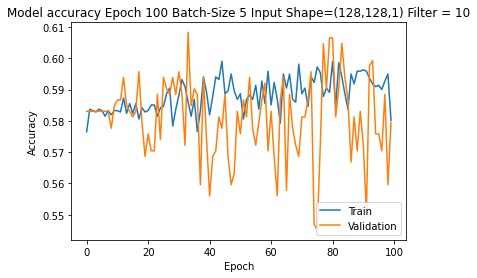

In [69]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(model_history_cnn5_filters10_size128.history['accuracy'])
plt.plot(model_history_cnn5_filters10_size128.history['val_accuracy'])
plt.title('Model accuracy Epoch 100 Batch-Size 5 Input Shape=(128,128,1) Filter = 10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

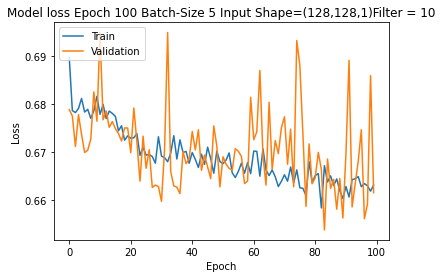

In [70]:
# Plot training & validation loss values
plt.plot(model_history_cnn5_filters10_size128.history['loss'])
plt.plot(model_history_cnn5_filters10_size128.history['val_loss'])
plt.title('Model loss Epoch 100 Batch-Size 5 Input Shape=(128,128,1)Filter = 10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
# Building the CNN model with more images for non-cancerous but filter = 10, size=128, batch = 5

# Initializing the cnn
cnn5_filters10_size128_Dense1 = tf.keras.models.Sequential()

# Adding the first convolution layer
cnn5_filters10_size128_Dense1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu', input_shape=[128,128,1]))

# Pooling
cnn5_filters10_size128_Dense1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Adding a second convolution layer and pooling
cnn5_filters10_size128_Dense1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(1, 1), padding="same", activation='relu'))
cnn5_filters10_size128_Dense1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

# Flattenning
cnn5_filters10_size128_Dense1.add(tf.keras.layers.Flatten())

# Full connection, that is starting the NN
# cnn5_filters10_size128_Dense1.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Output layer, a binary outpu
cnn5_filters10_size128_Dense1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile CNN
cnn5_filters10_size128_Dense1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training and evaluating
model_history_cnn5_filters10_size128_Dense1 = cnn5_filters10_size128_Dense1.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
445/445 [==============================] - 19s 44ms/step - loss: 0.6921 - accuracy: 0.5770 - val_loss: 0.6815 - val_accuracy: 0.6011
Epoch 2/100
445/445 [==============================] - 20s 45ms/step - loss: 0.6786 - accuracy: 0.5815 - val_loss: 0.6904 - val_accuracy: 0.5848
Epoch 3/100
445/445 [==============================] - 20s 46ms/step - loss: 0.6798 - accuracy: 0.5833 - val_loss: 0.6706 - val_accuracy: 0.5884
Epoch 4/100
445/445 [==============================] - 21s 47ms/step - loss: 0.6766 - accuracy: 0.5810 - val_loss: 0.6694 - val_accuracy: 0.5884
Epoch 5/100
445/445 [==============================] - 21s 47ms/step - loss: 0.6781 - accuracy: 0.5846 - val_loss: 0.6737 - val_accuracy: 0.5921
Epoch 6/100
445/445 [==============================] - 22s 49ms/step - loss: 0.6778 - accuracy: 0.5819 - val_loss: 0.6743 - val_accuracy: 0.6029
Epoch 7/100
445/445 [==============================] - 22s 49ms/step - loss: 0.6774 - accuracy: 0.5828 - val_loss: 0.6714 - val_ac

445/445 [==============================] - 22s 49ms/step - loss: 0.6703 - accuracy: 0.5878 - val_loss: 0.6661 - val_accuracy: 0.5812
Epoch 58/100
445/445 [==============================] - 22s 50ms/step - loss: 0.6720 - accuracy: 0.5878 - val_loss: 0.6679 - val_accuracy: 0.5830
Epoch 59/100
445/445 [==============================] - 23s 51ms/step - loss: 0.6669 - accuracy: 0.5950 - val_loss: 0.6854 - val_accuracy: 0.5758
Epoch 60/100
445/445 [==============================] - 24s 53ms/step - loss: 0.6714 - accuracy: 0.5887 - val_loss: 0.6755 - val_accuracy: 0.5578
Epoch 61/100
445/445 [==============================] - 22s 50ms/step - loss: 0.6681 - accuracy: 0.5891 - val_loss: 0.6712 - val_accuracy: 0.5668
Epoch 62/100
445/445 [==============================] - 22s 50ms/step - loss: 0.6666 - accuracy: 0.5909 - val_loss: 0.6797 - val_accuracy: 0.5542
Epoch 63/100
445/445 [==============================] - 22s 49ms/step - loss: 0.6741 - accuracy: 0.5914 - val_loss: 0.6660 - val_accuracy